   ID           Start_Time Weather_Condition  Severity  Start_Lat  Start_Lng  \
0   1  2022-05-01 08:30:00              Rain         2      34.05    -118.24   
1   2  2022-05-01 17:45:00             Clear         3      40.71     -74.00   
2   3  2022-05-02 22:15:00               Fog         4      41.88     -87.62   
3   4  2022-05-03 11:00:00              Snow         2      39.95     -75.16   
4   5  2022-05-03 14:30:00             Clear         1      29.76     -95.36   
5   6  2022-05-04 09:10:00              Rain         2      34.05    -118.24   
6   7  2022-05-04 18:20:00             Clear         3      40.71     -74.00   
7   8  2022-05-05 07:50:00               Fog         4      41.88     -87.62   
8   9  2022-05-05 20:40:00              Snow         2      39.95     -75.16   
9  10  2022-05-06 13:25:00              Rain         3      29.76     -95.36   

  Road_Condition  
0            Wet  
1            Dry  
2            Wet  
3          Snowy  
4            Dry  
5    

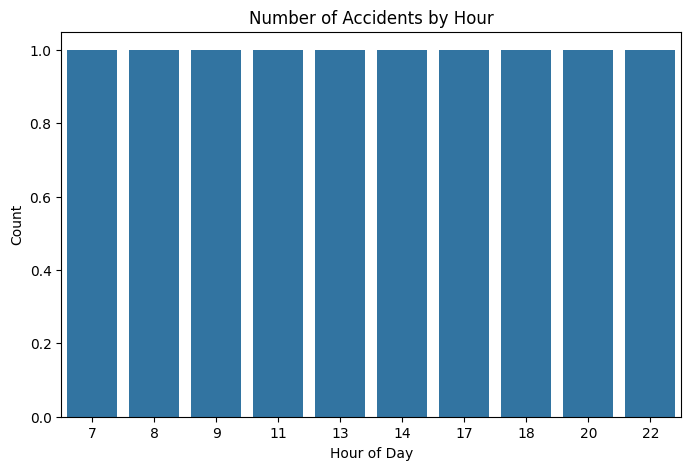

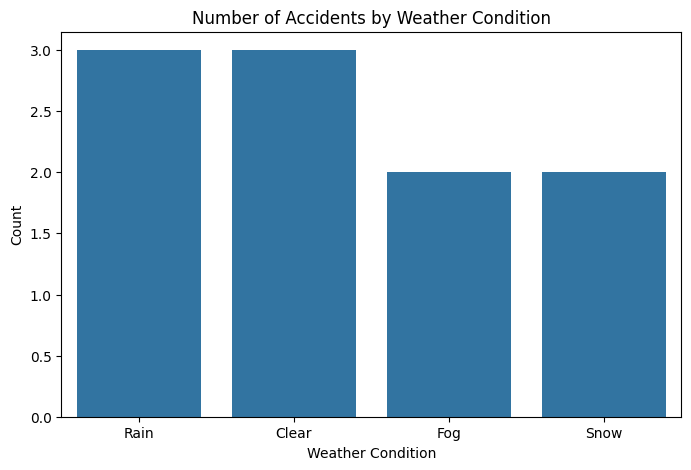

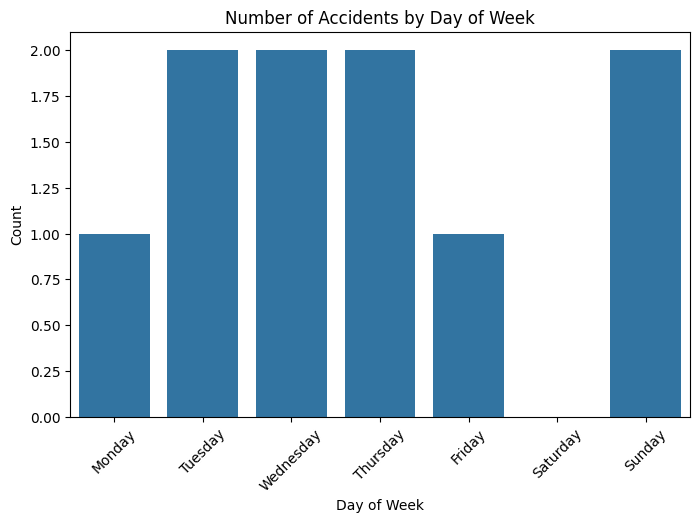

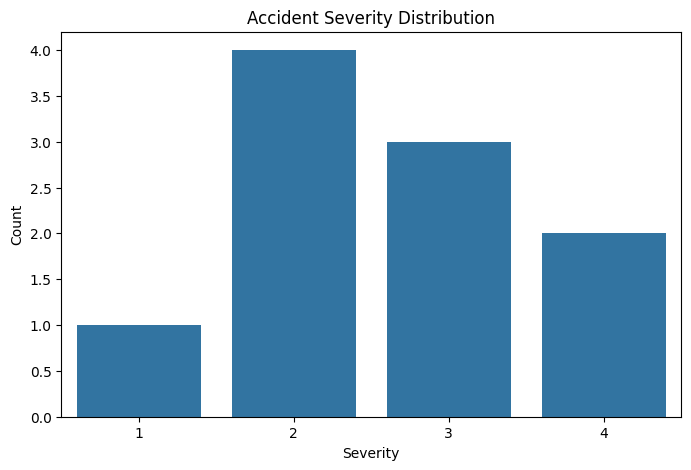

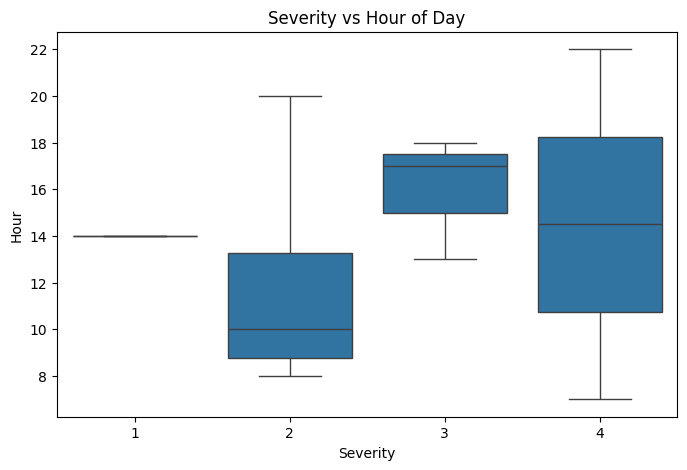

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

df = pd.read_csv(r'C:\Users\welcome\Documents\Task 4\accident_sample.csv')
print(df)

df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.day_name()

plt.figure(figsize=(8,5))
sns.countplot(x='Hour', data=df)
plt.title('Number of Accidents by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(x='Weather_Condition', data=df)
plt.title('Number of Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8,5))
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.countplot(x='DayOfWeek', data=df, order=order)
plt.title('Number of Accidents by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

m = folium.Map(location=[df['Start_Lat'].mean(), df['Start_Lng'].mean()], zoom_start=4)
heat_data = [[row['Start_Lat'], row['Start_Lng']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(m)
m

plt.figure(figsize=(8,5))
sns.countplot(x='Severity', data=df)
plt.title('Accident Severity Distribution')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='Severity', y='Hour', data=df)
plt.title('Severity vs Hour of Day')
plt.xlabel('Severity')
plt.ylabel('Hour')
plt.show()